# Cars24 Used Car Price Analysis
- The dataset contains used car listings from the Cars24 platform, covering multiple states, fuel types, manufacturing years, and pricing attributes.

## 1. Introduction
- **Objective of the analysis** - `"Used cars analysis on Area wise and all over india"`

- **Brief dataset overview**:-

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars24 = pd.read_csv(r"Cars24.csv")

In [3]:
df = cars24.copy(deep= True)

## 2. Dataset Overview
- Number of rows & columns

In [4]:
df

,year_manufactured,brand,model,km_tra,fuel,trans,rto,emi,sale_price
0,2019,Maruti,Celerio,85350,CNG,Manual,Haryana,6432.0,329000.0
1,2019,Maruti,New Wagon-R,74374,Petrol,Manual,Haryana,5719.0,324000.0
2,2022,Hyundai,NEW SANTRO,91678,CNG,Manual,Haryana,6743.0,382000.0
3,2022,Tata,NEXON,21703,Petrol,Manual,Karnataka,12233.0,693000.0
4,2020,KIA,SONET,38236,Petrol,Manual,Uttar Pradesh,10203.0,578000.0
...,...,...,...,...,...,...,...,...,...
3175,2022,Nissan,MAGNITE,75684,Petrol,Manual,Karnataka,10463.0,593000.0
3176,2019,Hyundai,VENUE,63224,Petrol,Manual,Telangana,11383.0,645000.0
3177,2018,Honda,WR-V,76894,Diesel,Manual,Telangana,11671.0,597000.0
3178,2019,MG,HECTOR,83300,Petrol,Auto,Haryana,15376.0,898000.0


- Variable types (Numerical & Categorical)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_manufactured  3180 non-null   int64  
 1   brand              3180 non-null   str    
 2   model              3180 non-null   str    
 3   km_tra             3180 non-null   int64  
 4   fuel               3180 non-null   str    
 5   trans              3180 non-null   str    
 6   rto                3180 non-null   str    
 7   emi                3154 non-null   float64
 8   sale_price         3180 non-null   float64
dtypes: float64(2), int64(2), str(5)
memory usage: 325.3 KB


## 3. Data Cleaning & Preparation
- Column renaming
- Missing value handling
- Data type corrections

In [6]:
df = df.rename(columns={"km_tra": "km_travel", "trans": "transmission", "rto":"state", "emi":"emi_per_month", "sale_price":"price_of_car"})

In [7]:
df

,year_manufactured,brand,model,km_travel,fuel,transmission,state,emi_per_month,price_of_car
0,2019,Maruti,Celerio,85350,CNG,Manual,Haryana,6432.0,329000.0
1,2019,Maruti,New Wagon-R,74374,Petrol,Manual,Haryana,5719.0,324000.0
2,2022,Hyundai,NEW SANTRO,91678,CNG,Manual,Haryana,6743.0,382000.0
3,2022,Tata,NEXON,21703,Petrol,Manual,Karnataka,12233.0,693000.0
4,2020,KIA,SONET,38236,Petrol,Manual,Uttar Pradesh,10203.0,578000.0
...,...,...,...,...,...,...,...,...,...
3175,2022,Nissan,MAGNITE,75684,Petrol,Manual,Karnataka,10463.0,593000.0
3176,2019,Hyundai,VENUE,63224,Petrol,Manual,Telangana,11383.0,645000.0
3177,2018,Honda,WR-V,76894,Diesel,Manual,Telangana,11671.0,597000.0
3178,2019,MG,HECTOR,83300,Petrol,Auto,Haryana,15376.0,898000.0


In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_manufactured  3180 non-null   int64  
 1   brand              3180 non-null   str    
 2   model              3180 non-null   str    
 3   km_travel          3180 non-null   int64  
 4   fuel               3180 non-null   str    
 5   transmission       3180 non-null   str    
 6   state              3180 non-null   str    
 7   emi_per_month      3154 non-null   float64
 8   price_of_car       3180 non-null   float64
dtypes: float64(2), int64(2), str(5)
memory usage: 325.3 KB


In [9]:
df[df['emi_per_month'].isna()]

,year_manufactured,brand,model,km_travel,fuel,transmission,state,emi_per_month,price_of_car
451,2013,Hyundai,i20,96543,CNG,Manual,Gujarat,NaN,189000.0
596,2012,Volkswagen,Polo,128734,Diesel,Manual,Kerala,NaN,191000.0
639,2012,Hyundai,Verna,111489,Diesel,Manual,Andhra Pradesh,NaN,255000.0
1062,2012,Hyundai,i10,117801,CNG,Auto,Maharashtra,NaN,192000.0
1110,2012,Ford,Figo,76088,Diesel,Manual,Karnataka,NaN,170000.0
1116,2012,Ford,Figo,133231,Diesel,Manual,Karnataka,NaN,147000.0
1385,2012,Maruti,Ritz,65548,CNG,Manual,Karnataka,NaN,213000.0
1546,2012,Maruti,Swift,85795,Diesel,Manual,Kerala,NaN,240000.0
1610,2013,Skoda,Rapid,82139,CNG,Auto,Tamil Nadu,NaN,264000.0
1647,2013,Maruti,Swift Dzire,93343,CNG,Manual,Maharashtra,NaN,274000.0


In [10]:
df[df['emi_per_month'].isna()]= df[df['emi_per_month'].isna()].fillna(0)

In [11]:
df[df['emi_per_month'] == 0][:5]

,year_manufactured,brand,model,km_travel,fuel,transmission,state,emi_per_month,price_of_car
451,2013,Hyundai,i20,96543,CNG,Manual,Gujarat,0.0,189000.0
596,2012,Volkswagen,Polo,128734,Diesel,Manual,Kerala,0.0,191000.0
639,2012,Hyundai,Verna,111489,Diesel,Manual,Andhra Pradesh,0.0,255000.0
1062,2012,Hyundai,i10,117801,CNG,Auto,Maharashtra,0.0,192000.0
1110,2012,Ford,Figo,76088,Diesel,Manual,Karnataka,0.0,170000.0


In [12]:
df['emi_per_month'] = df['emi_per_month'].astype('int')

In [13]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_manufactured  3180 non-null   int64  
 1   brand              3180 non-null   str    
 2   model              3180 non-null   str    
 3   km_travel          3180 non-null   int64  
 4   fuel               3180 non-null   str    
 5   transmission       3180 non-null   str    
 6   state              3180 non-null   str    
 7   emi_per_month      3180 non-null   int64  
 8   price_of_car       3180 non-null   float64
dtypes: float64(1), int64(3), str(5)
memory usage: 325.3 KB


In [14]:
df['price_of_car'] = df['price_of_car'].astype('int')

In [15]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   year_manufactured  3180 non-null   int64
 1   brand              3180 non-null   str  
 2   model              3180 non-null   str  
 3   km_travel          3180 non-null   int64
 4   fuel               3180 non-null   str  
 5   transmission       3180 non-null   str  
 6   state              3180 non-null   str  
 7   emi_per_month      3180 non-null   int64
 8   price_of_car       3180 non-null   int64
dtypes: int64(4), str(5)
memory usage: 325.3 KB


In [46]:
df

,year_manufactured,brand,model,km_travel,fuel,transmission,state,emi_per_month,price_of_car
0,2019,Maruti,Celerio,85350,CNG,Manual,Haryana,6432,329000
1,2019,Maruti,New Wagon-R,74374,Petrol,Manual,Haryana,5719,324000
2,2022,Hyundai,NEW SANTRO,91678,CNG,Manual,Haryana,6743,382000
3,2022,Tata,NEXON,21703,Petrol,Manual,Karnataka,12233,693000
4,2020,KIA,SONET,38236,Petrol,Manual,Uttar Pradesh,10203,578000
...,...,...,...,...,...,...,...,...,...
3175,2022,Nissan,MAGNITE,75684,Petrol,Manual,Karnataka,10463,593000
3176,2019,Hyundai,VENUE,63224,Petrol,Manual,Telangana,11383,645000
3177,2018,Honda,WR-V,76894,Diesel,Manual,Telangana,11671,597000
3178,2019,MG,HECTOR,83300,Petrol,Auto,Haryana,15376,898000


4.Univariate Analysis
------------------
- Numerical variables
- Categorical variables
- Key observations
  
Univariate analysis focuses on analyzing a single variable at a time.
It helps in understanding the distribution, central tendency, and spread of data.

1. Numerical Variables  
> This section analyzes individual numerical variables to understand their distribution, central tendency, and spread in the used car dataset.
----------------------
A. Visualization Techniques
   - Scatter Plot
   - Histogram
   - KDE Plot
   - Box Plot

B. Non-Visualization (Statistical Measures)
   - Mean
   - Median
   - Mode
   - Variance
   - Standard Deviation (Std)
   - Skewness
   - Kurtosis
   - Interquartile Range (IQR)

2. Categorical Variables
------------------------
A. Visualization Techniques
   - Bar Plot
   - Count Plot
   - Pie Chart

B. Non-Visualization (Summary Measures)
   - Proportions (value_counts)

### Numerical — Statistical Analysis (Non-visual)

In [17]:
#### Extracting the numerical columns
num_cols = df.select_dtypes(exclude='str').columns.values
num_cols = num_cols[num_cols != 'manufactured_year']
num_cols

<ArrowStringArray>
['year_manufactured', 'km_travel', 'emi_per_month', 'price_of_car']
Length: 4, dtype: str

In [18]:
#### Extracting the Ctegorical columns
cat_cols = df.select_dtypes(include='str').columns.values
cat_cols

<ArrowStringArray>
['brand', 'model', 'fuel', 'transmission', 'state']
Length: 5, dtype: str

In [19]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
year_manufactured,3180.0,2018.166981,3.020968,2011.0,2016.0,2018.0,2021.00,2025.0
km_travel,3180.0,61148.736164,29696.247009,111.0,38494.0,59338.5,80191.25,150022.0
emi_per_month,3180.0,10334.897484,11893.180537,0.0,6708.0,8759.5,11723.25,528080.0
price_of_car,3180.0,488703.144654,419324.640796,97000.0,285000.0,403000.0,576000.00,8700000.0


In [20]:
#### Univariate Analysis in Numerical cols -manufactured_year', 'km_travelled', 'emi', 'sale_price'
#### Non-visualization Analysis

for col in num_cols:
    print(f"------------{col}---------")
    print("Mean:",df[col].mean())
    print("Median:",df[col].median())
    print("Variance:",df[col].var())
    print("Min:", df[col].min())
    print("Max:", df[col].max())
    print("Standard deviation:",df[col].std())
    print("Skewness:",df[col].skew())
    print("Kurtosis:",df[col].kurtosis())

------------year_manufactured---------
Mean: 2018.1669811320755
Median: 2018.0
Variance: 9.126245051547066
Min: 2011
Max: 2025
Standard deviation: 3.020967568767839
Skewness: 0.015397358835780164
Kurtosis: -0.8722141140191746
------------km_travel---------
Mean: 61148.736163522015
Median: 59338.5
Variance: 881867086.4270661
Min: 111
Max: 150022
Standard deviation: 29696.247009126695
Skewness: 0.4702423937733868
Kurtosis: -0.1271816254099245
------------emi_per_month---------
Mean: 10334.89748427673
Median: 8759.5
Variance: 141447743.28549275
Min: 0
Max: 528080
Standard deviation: 11893.180536992313
Skewness: 27.84122259603842
Kurtosis: 1144.395460409488
------------price_of_car---------
Mean: 488703.1446540881
Median: 403000.0
Variance: 175833154378.28027
Min: 97000
Max: 8700000
Standard deviation: 419324.6407955062
Skewness: 8.516101429349053
Kurtosis: 120.70639556197436


# insights

### Numerical — Visual Analysis

------------ km_travel ------------


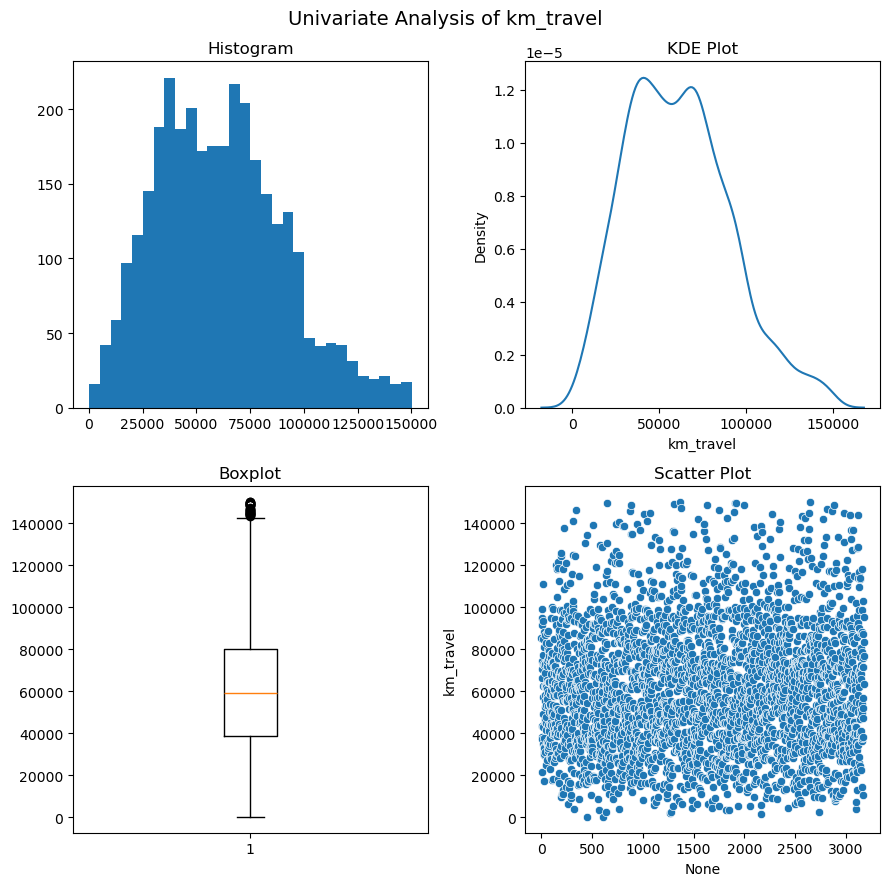

In [21]:
col = "km_travel"

print(f"------------ {col} ------------")

fig, ax = plt.subplots(2, 2, figsize=(9,9))

#### Histogram
ax[0, 0].hist(df[col], bins=30)
ax[0, 0].set_title("Histogram")

#### KDE
sns.kdeplot(df[col], ax=ax[0, 1])
ax[0, 1].set_title("KDE Plot")

#### Boxplot
ax[1, 0].boxplot(df[col])
ax[1, 0].set_title("Boxplot")

#### Scatter (Index vs Column)
sns.scatterplot(x=df.index, y=df[col], ax=ax[1, 1])
ax[1, 1].set_title("Scatter Plot")

plt.suptitle(f"Univariate Analysis of {col}", fontsize=14)
plt.tight_layout()
plt.show()

**Key Insights** - (km_travelled)
* **Moderate usage vehicles dominate:** Most cars have run between `30,000 and 90,000 km`, with a median around `59,000 km`.
* **Limited high-mileage cars:** Some vehicles exceed `1.2–1.5 lakh km`, forming a right tail but without extreme influence.
* **Stable and balanced spread:** Moderate skewness and negative kurtosis indicate a `fairly even mileage distribution` across the dataset.

------------ emi_per_month ------------


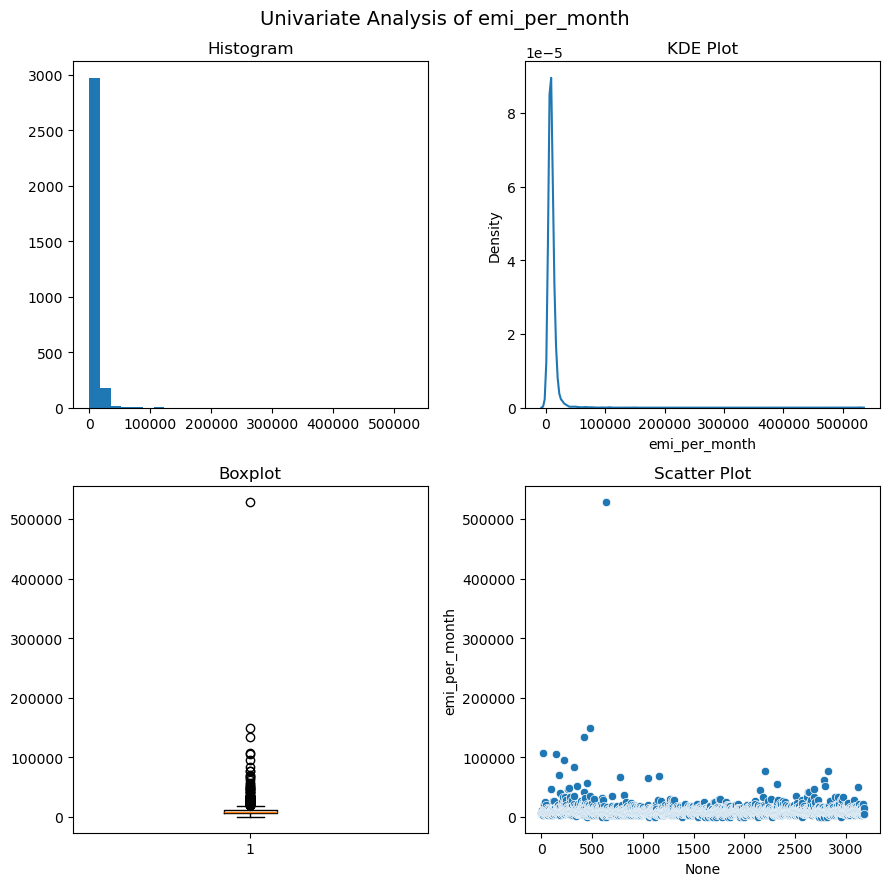

In [22]:
col = "emi_per_month"

print(f"------------ {col} ------------")

fig, ax = plt.subplots(2, 2, figsize=(9,9))

#### Histogram
ax[0, 0].hist(df[col], bins=30)
ax[0, 0].set_title("Histogram")

#### KDE
sns.kdeplot(df[col], ax=ax[0, 1])
ax[0, 1].set_title("KDE Plot")

#### Boxplot
ax[1, 0].boxplot(df[col])
ax[1, 0].set_title("Boxplot")

#### Scatter (Index vs Column)
sns.scatterplot(x=df.index, y=df[col], ax=ax[1, 1])
ax[1, 1].set_title("Scatter Plot")

plt.suptitle(f"Univariate Analysis of {col}", fontsize=14)
plt.tight_layout()
plt.show()

**Key Insights** - (emi_per_month)
* **Low EMI values are common:** Most customers fall into `low to moderate EMI brackets`, indicating affordability for the majority.
* **Extreme EMI outliers exist:** Few records show `exceptionally high EMIs`, stretching the distribution far to the right.
* **Highly irregular pattern:** Extremely high `skewness and kurtosis` show EMI data is `dominated by outliers` and requires careful handling in modeling.

------------ price_of_car ------------


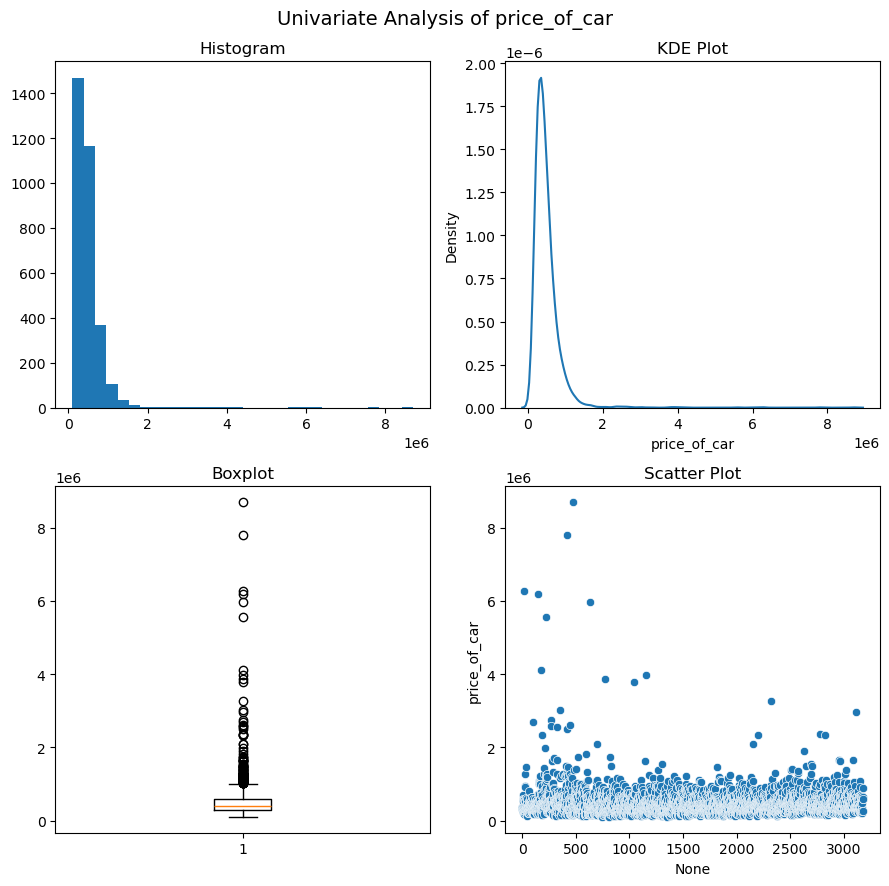

In [23]:
col = "price_of_car"

print(f"------------ {col} ------------")

fig, ax = plt.subplots(2, 2, figsize=(9,9))

#### Histogram
ax[0, 0].hist(df[col], bins=30)
ax[0, 0].set_title("Histogram")

#### KDE
sns.kdeplot(df[col], ax=ax[0, 1])
ax[0, 1].set_title("KDE Plot")

#### Boxplot
ax[1, 0].boxplot(df[col])
ax[1, 0].set_title("Boxplot")

#### Scatter (Index vs Column)
sns.scatterplot(x=df.index, y=df[col], ax=ax[1, 1])
ax[1, 1].set_title("Scatter Plot")

plt.suptitle(f"Univariate Analysis of {col}", fontsize=14)
plt.tight_layout()
plt.show()

**Key Insights** - (price_of_car)
* **Affordable segment dominates:** Majority of cars are priced in the `lower to mid-range`, with most values below `₹10 lakh`.
* **Presence of luxury vehicles:** A `long right tail` and several high-end outliers (up to `₹80+ lakh`) indicate a small luxury segment.
* **Highly skewed distribution:** Very high `skewness and kurtosis` confirm prices are `non-uniform and outlier-driven`, not normally distributed.

------------ year_manufactured ------------


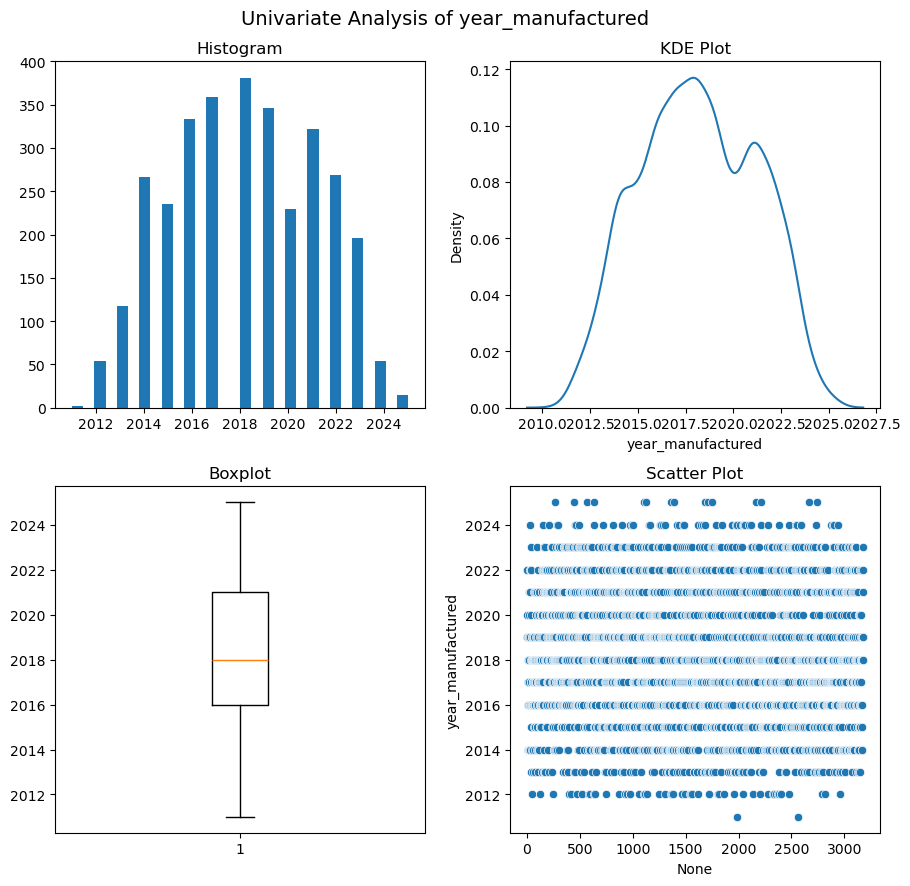

In [24]:
col = "year_manufactured"

print(f"------------ {col} ------------")

fig, ax = plt.subplots(2, 2, figsize=(9,9))

#### Histogram
ax[0, 0].hist(df[col], bins=30)
ax[0, 0].set_title("Histogram")

#### KDE
sns.kdeplot(df[col], ax=ax[0, 1])
ax[0, 1].set_title("KDE Plot")

#### Boxplot
ax[1, 0].boxplot(df[col])
ax[1, 0].set_title("Boxplot")

##### Scatter (Index vs Column)
sns.scatterplot(x=df.index, y=df[col], ax=ax[1, 1])
ax[1, 1].set_title("Scatter Plot")

plt.suptitle(f"Univariate Analysis of {col}", fontsize=14)
plt.tight_layout()
plt.show()

**Key Insights** - (year_manufacture)
* **Used-car dominant inventory:** Most cars are `4–10 years old`, with the highest concentration around `6–8 years`, indicating a mature and stable used-car market.
* **Well-balanced age distribution:** Nearly symmetric distribution with `very low skewness`, showing no bias toward extremely new or very old vehicles.
* **Clean and reliable data:** Age ranges from `0 to 14` years with `no extreme outliers`, reflecting controlled data quality.

### Categorical — Frequency Analysis

In [25]:
cat_cols = df.select_dtypes(include='str').columns

for col in cat_cols:
    print(f"\n------------ {col} ------------")
    print(df[col].value_counts())


------------ brand ------------
brand
Maruti        876
Hyundai       708
Tata          355
Honda         296
Renault       216
Ford          116
Mahindra      106
KIA           101
Volkswagen     93
Datsun         55
Nissan         55
Toyota         55
Skoda          55
MG             45
Jeep           22
Mercedes        7
Audi            5
BMW             5
Chevrolet       4
Landrover       3
Jaguar          1
Fiat            1
Name: count, dtype: int64

------------ model ------------
model
Grand i10     153
Kwid          135
Swift         123
NEXON         114
Elite i20     112
             ... 
Endeavour       1
Lodgy           1
Cross Polo      1
A4              1
Sonata          1
Name: count, Length: 165, dtype: int64

------------ fuel ------------
fuel
Petrol      2600
Diesel       385
CNG          191
Hybrid         3
Electric       1
Name: count, dtype: int64

------------ transmission ------------
transmission
Manual    2455
Auto       725
Name: count, dtype: int64

-----

# insights

### Categorical — Visual Analysis

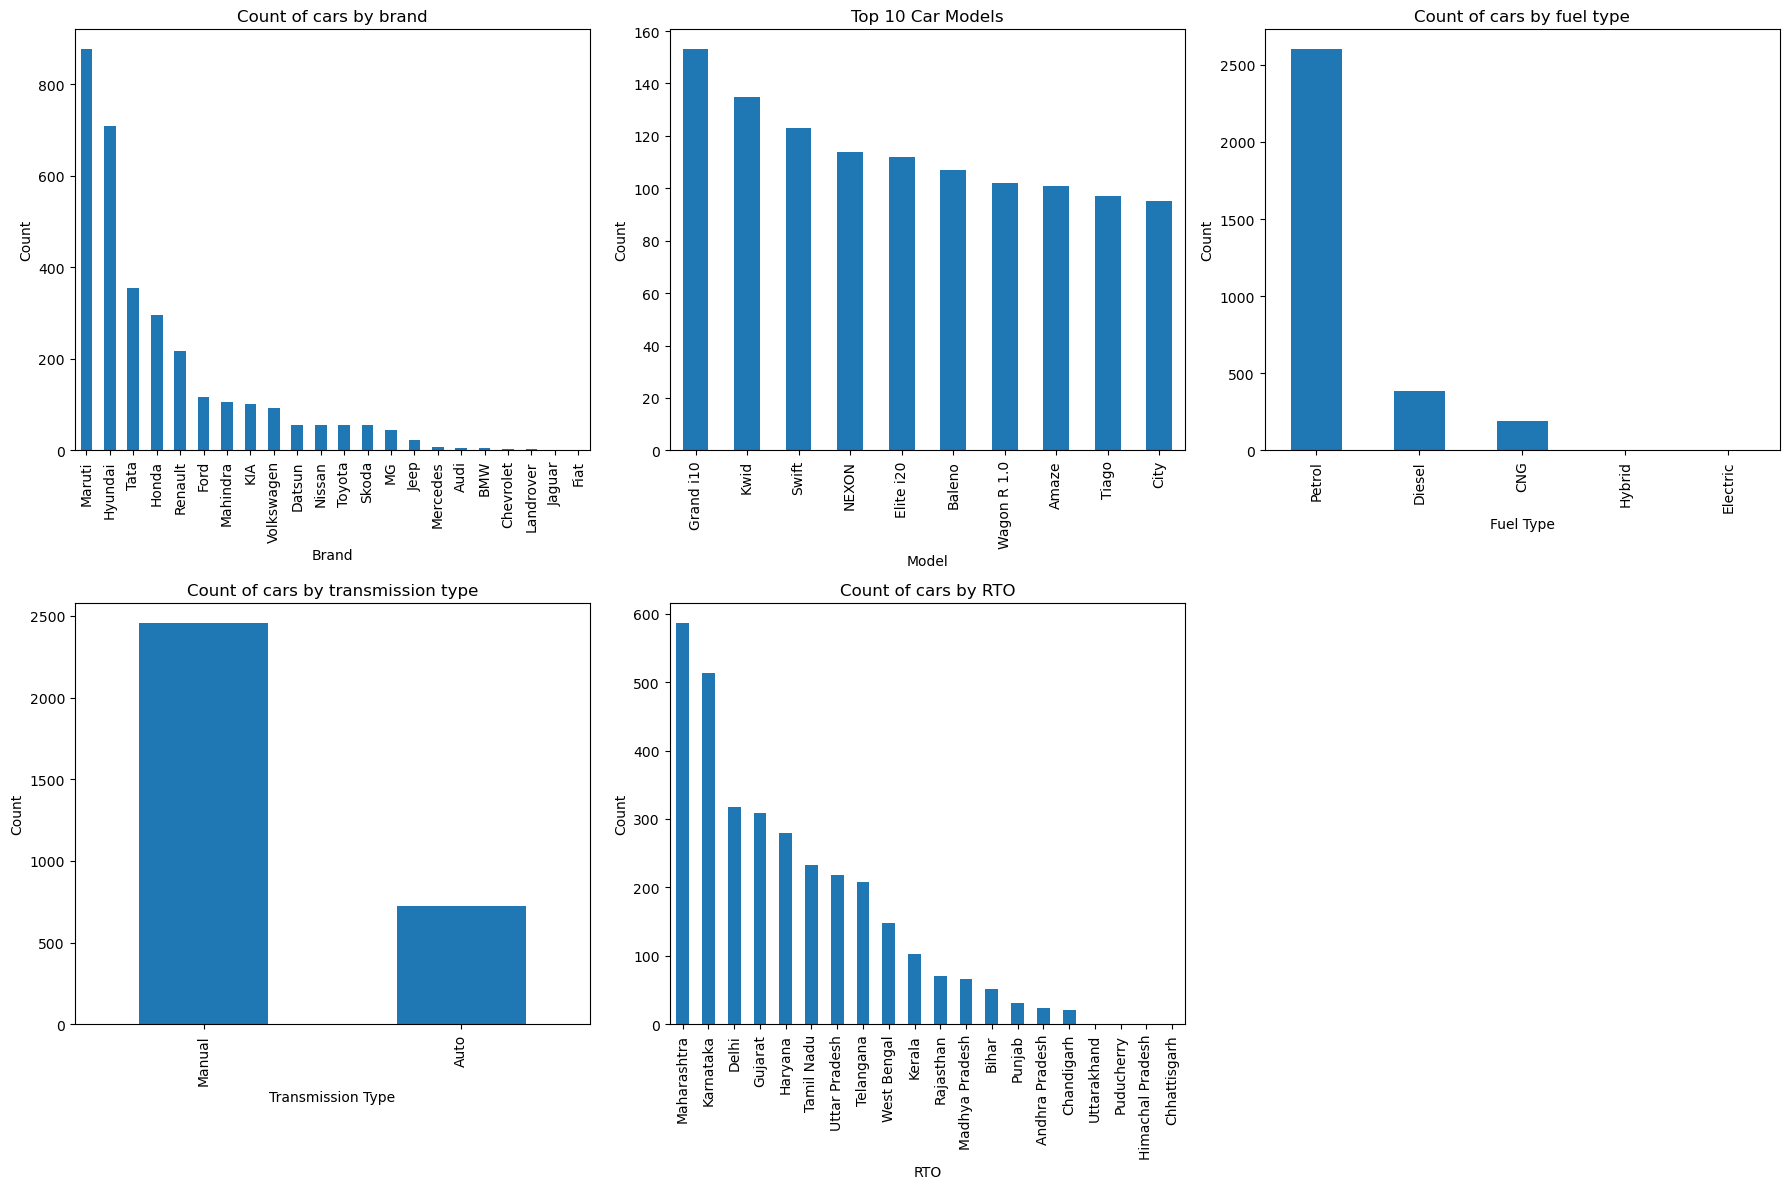

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

#### 1. Brand
df['brand'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Count of cars by brand')
axes[0].set_xlabel('Brand')
axes[0].set_ylabel('Count')

#### 2. Model (Top 10)
df['model'].value_counts().head(10).plot(kind='bar', ax=axes[1])
axes[1].set_title('Top 10 Car Models')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Count')

#### 3. Fuel Type
df['fuel'].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Count of cars by fuel type')
axes[2].set_xlabel('Fuel Type')
axes[2].set_ylabel('Count')

#### 4. Transmission Type
df['transmission'].value_counts().plot(kind='bar', ax=axes[3])
axes[3].set_title('Count of cars by transmission type')
axes[3].set_xlabel('Transmission Type')
axes[3].set_ylabel('Count')

#### 5. RTO
df['state'].value_counts().plot(kind='bar', ax=axes[4])
axes[4].set_title('Count of cars by RTO')
axes[4].set_xlabel('RTO')
axes[4].set_ylabel('Count')

#### Remove empty subplot (6th)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

**Key Insights**

* **Maruti and Hyundai** clearly dominate the dataset with the highest car counts.
* **No single car model** overwhelmingly dominates among the top 10 models.
* **Petrol** is the most common fuel type, with Diesel far behind and others negligible.
* **Manual transmission** cars clearly dominate the dataset, accounting for `about 77%` of all vehicles, while **automatic cars** make up only `around 23%`.
* Car registrations are concentrated in a few RTOs, especially **Maharashtra and Karnataka**.

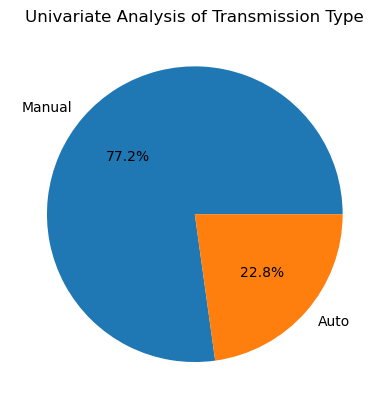

In [27]:
#### Pie distribution of fuel transmission type
df['transmission'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Univariate Analysis of Transmission Type")
plt.show()

# insights

**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

5.Bivariate Analysis
-----------------

Bivariate analysis focuses on understanding the relationship 
between two variables at a time.

1. Numerical vs Numerical
-------------------------
A. Visualization Techniques
   - Scatter Plot
   - Jointplot
   - Line Plot
   - Regression Plot (regplot)
   - Box Plot

B. Non-Visualization (Statistical Measures)
   - Correlation Coefficient
   - Pivot Table

2. Numerical vs Categorical
----------------------------
A. Visualization Techniques
   - Bar Plot
   - Box Plot
   - Violin Plot
   - Displot
   - Histogram (with hue)

B. Non-Visualization (Statistical Measures)
   - GroupBy
   - Pivot Table

3. Categorical vs Categorical
------------------------------
A. Visualization Techniques
   - Count Plot
   - Stacked Bar Plot

B. Non-Visualization (Statistical Measures)
   - Crosstab

### Dataset Variable Types

Numerical: `year_manufactured, km_travel, emi_per_month, price_of_car`  

Categorical: `brand, fuel, transmission, rto (State), model`  

### 5.1 Numerical vs Numerical
#### A. Non-Visualization (Statistical Measures)

In [28]:
# 1) Correlation Coefficient - [KM traveled - sale price, emi]
df[['km_travel', 'price_of_car', 'emi_per_month']].corr()

,km_travel,price_of_car,emi_per_month
km_travel,1.000000,-0.14098,-0.031756
price_of_car,-0.140980,1.00000,0.728370
emi_per_month,-0.031756,0.72837,1.000000


#### Insights
- **Car price and EMI** show a strong positive correlation, indicating that higher-priced cars result in higher monthly installments.  
- **Kilometers travelled and car price** show a weak negative correlation, suggesting mileage alone has limited impact on resale value.

In [29]:
# 2) Pivot table - [year_manufactured, sale_price]
pd.pivot_table(
    df,
    values='price_of_car',
    index='year_manufactured',
    aggfunc='mean'
).sort_index().round(0)

,price_of_car
year_manufactured,
2011,147500.0
2012,302667.0
2013,243644.0
2014,253079.0
2015,326021.0
2016,335856.0
2017,392579.0
2018,429089.0
2019,527971.0


#### Insights
- **Year of manufacture and car price** show a strong positive relationship, with newer vehicles commanding higher average resale prices.
- **Post-2018 vehicles** exhibit a sharp increase in average prices, indicating higher demand for newer models with advanced features.
---

### B. Visualization Techniques
---

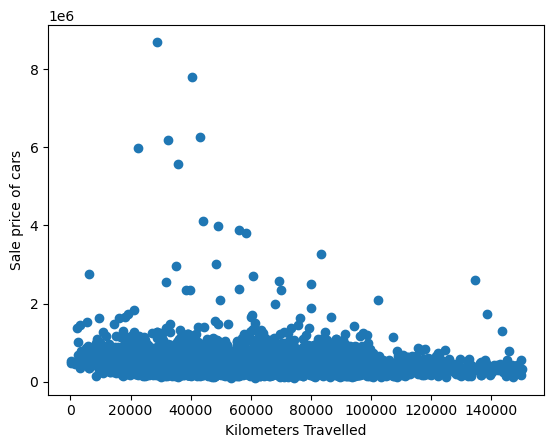

In [30]:
# 1) Scatter Plot - [km_tra & sale_price]
plt.scatter(df['km_travel'], df['price_of_car'])
plt.xlabel("Kilometers Travelled")
plt.ylabel("Sale price of cars")
plt.show()

#### Insights
- **Kilometers travelled and car price** show a weak negative relationship, indicating that higher mileage generally reduces resale value.
- **Wide price dispersion at lower mileage** suggests that factors like vehicle age, brand, and fuel type also influence pricing.

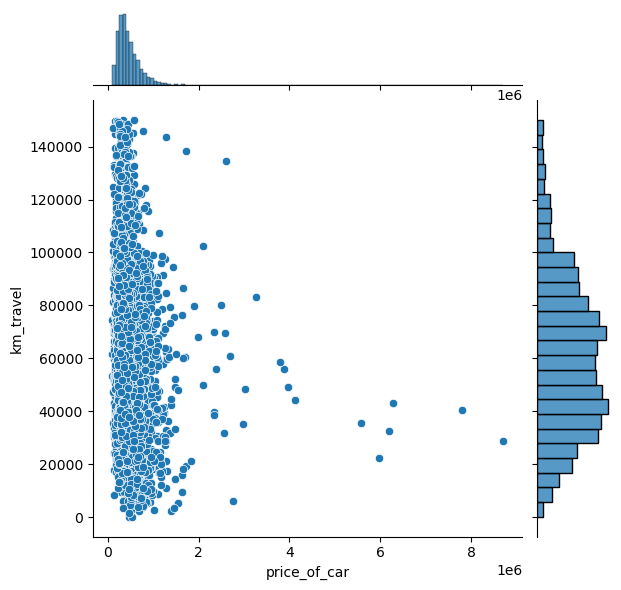

In [31]:
# 2) Jointplot - [km_travel vs price_of_car]
sns.jointplot(
    data=df,
    x='price_of_car',
    y='km_travel'
)
plt.show()

#### Insights
- **Car price and kilometers travelled** show a weak inverse relationship, confirming mileage-related depreciation.
- **High-priced vehicles are concentrated at lower mileage levels**, indicating premium cars retain value when usage is limited.


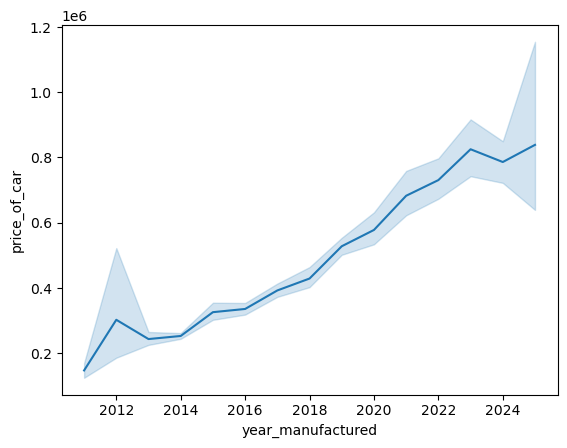

In [32]:
# 3) Line Plot - [year_manufactured & sale_price]
sns.lineplot(
    data=df,
    x='year_manufactured',
    y='price_of_car'
)
plt.show()

#### Insights
- **Year of manufacture and car price** show a strong positive relationship, with newer vehicles commanding higher resale values.
- **Post-2018 models** exhibit a sharp rise in prices, reflecting increased demand for newer technology and features.

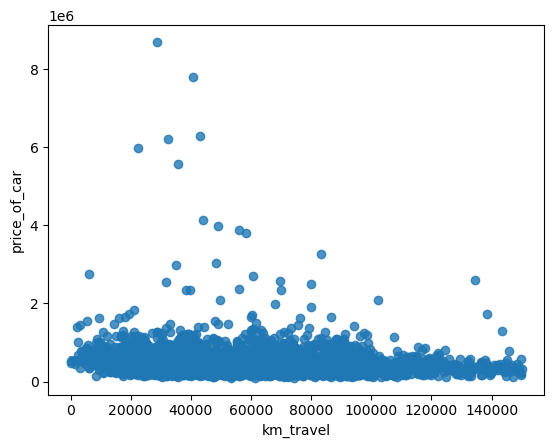

In [33]:
# 4) Regression Plot (regplot) - [km_tra & sale_price]
sns.regplot(
    data=df,
    x='km_travel',
    y='price_of_car'
)
plt.show()

#### Insights
- **Kilometers travelled and car price** show a negative relationship, indicating that higher mileage generally leads to lower resale value.
- **Wide dispersion around the regression line** suggests that mileage alone is not a strong predictor of car price.

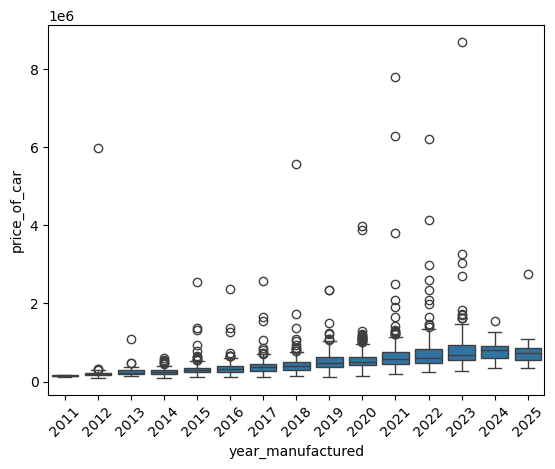

In [34]:
# 5) Box Plot - [year_manufactured & sale_price]
sns.boxplot(
    data=df,
    x='year_manufactured',
    y='price_of_car'
)
plt.xticks(rotation=45)
plt.show()

#### Insights
- **Year of manufacture and car price** show a strong positive relationship, with newer vehicles having higher median resale prices.
- **Recent manufacturing years display wider price dispersion**, indicating the presence of both budget and premium vehicles.
- **Outliers in newer years** suggest premium and luxury cars significantly influence resale price variation.

---
### 5.2 Numerical vs Categorical
#### A. Non-Visualization (Statistical Measures)

In [35]:
# 1) GroupBy - [state & price of cars]
group_by = df.groupby('state')['price_of_car'].median().round(0)
group_by

state
Andhra Pradesh       257500.0
Bihar                445000.0
Chandigarh           445000.0
Chhattisgarh         245000.0
Delhi                322000.0
Gujarat              400000.0
Haryana              391000.0
Himachal Pradesh    2350000.0
Karnataka            496000.0
Kerala               310000.0
Madhya Pradesh       426000.0
Maharashtra          380000.0
Puducherry          5975000.0
Punjab               499000.0
Rajasthan            437500.0
Tamil Nadu           386000.0
Telangana            428000.0
Uttar Pradesh        461500.0
Uttarakhand          340000.0
West Bengal          400000.0
Name: price_of_car, dtype: float64

#### Insights
- **Median car prices vary significantly across states**, indicating strong regional differences in used car valuation.
- **States like Karnataka, Punjab, and Uttar Pradesh** show higher median prices, reflecting stronger demand for relatively newer or premium vehicles.
- **Extremely high median values in Puducherry and Himachal Pradesh** suggest the presence of high-value vehicles and possible low sample sizes.
- **Lower median prices in states such as Andhra Pradesh and Chhattisgarh** indicate a higher concentration of budget or older vehicles.

In [36]:
### Pivot Table [city, sale_price & fuel]
pivot = pd.pivot_table(
    df,
    values='price_of_car',
    index='state',
    columns='fuel',
    aggfunc='mean'
)

pivot = pivot.round(0)
pivot

fuel,CNG,Diesel,Electric,Hybrid,Petrol
state,,,,,
Andhra Pradesh,NaN,336250.0,NaN,NaN,314800.0
Bihar,416500.0,835667.0,NaN,NaN,440050.0
Chandigarh,360000.0,812000.0,NaN,NaN,467294.0
Chhattisgarh,NaN,NaN,NaN,NaN,245000.0
Delhi,405600.0,791250.0,NaN,NaN,385490.0
Gujarat,394030.0,602415.0,NaN,NaN,441863.0
Haryana,447276.0,876583.0,NaN,NaN,438111.0
Himachal Pradesh,NaN,2350000.0,NaN,NaN,NaN
Karnataka,431800.0,564094.0,NaN,1481000.0,514626.0


#### Insights
- **Average car prices vary significantly across both states and fuel types**, indicating strong regional and fuel-based segmentation.
- **Diesel vehicles consistently command higher average prices** across most states, reflecting their durability and suitability for long-distance usage.
- **Petrol cars are present across almost all states**, highlighting their dominance and liquidity in the used car market.
- **Electric and hybrid vehicles appear in limited states**, suggesting early-stage adoption and lower resale market penetration.
- **Extremely high averages in states like Puducherry and Himachal Pradesh** are likely influenced by a small number of high-value listings.

#### B. Visualization Techniques

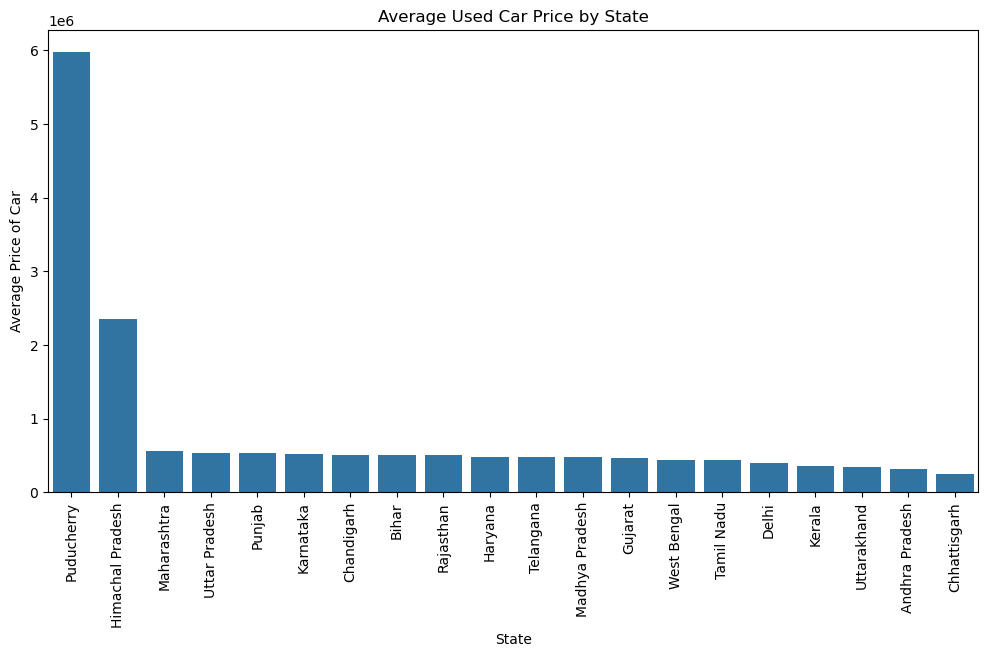

In [37]:
# 1) Bar Plot - [state vs average price_of_car ]
avg_price = df.groupby('state')['price_of_car'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.xticks(rotation=90)
plt.title("Average Used Car Price by State")
plt.xlabel("State")
plt.ylabel("Average Price of Car")
plt.show()

#### Insights
- **Average used car prices vary substantially across states**, indicating strong regional differences in resale market dynamics.
- **States with higher average prices** (such as Maharashtra, Karnataka, Punjab, and Uttar Pradesh) likely reflect greater demand for newer or premium vehicles, higher income levels, and stronger urban presence.
- **States with lower average prices** suggest a higher concentration of older or budget vehicles, possibly driven by lower purchasing power or rural dominance.
- **Extremely high average prices in certain states** may be influenced by a small number of high-value listings, highlighting the impact of outliers on mean-based analysis.
- Overall, the plot indicates that **state-level factors play a crucial role in determining used car pricing**, emphasizing the need for region-specific pricing and inventory strategies.

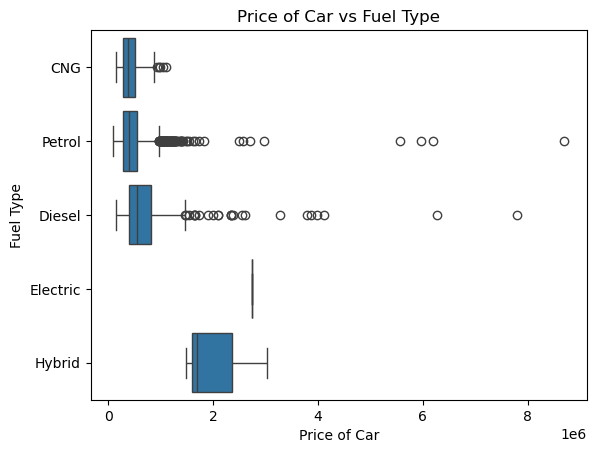

In [60]:
# 2) Box Plot - [price_of_car vs fuel]
sns.boxplot(
    data=df,
    x='price_of_car',
    y='fuel'
)
plt.title('Price of Car vs Fuel Type')
plt.xlabel('Price of Car')
plt.ylabel('Fuel Type')
plt.show()

#### Insights
- **Fuel type has a strong influence on resale price**, with clear differences in median prices and price spread across categories.
- **Diesel vehicles command higher median resale values**, indicating stronger demand and better value retention for long-distance usage.
- **Petrol cars span a wide price range**, reflecting their presence across both entry-level and premium vehicle segments.
- **CNG vehicles are concentrated in lower price ranges**, while electric and hybrid vehicles show limited variation due to smaller sample sizes.


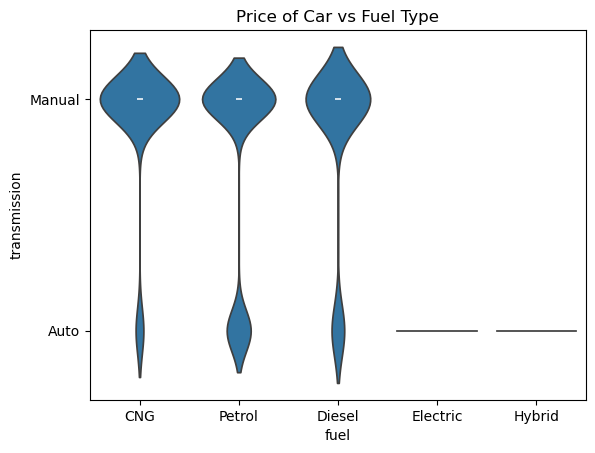

In [54]:
# 3) Violin Plot - [price_of_car vs fuel]
sns.violinplot(
    data=df,
    x='fuel',
    y='transmission',
    inner='box'
)
plt.title('Price of Car vs Fuel Type')
plt.show()

#### Insights
- **Price distribution differs noticeably across fuel types**, with clear variation in density and spread, highlighting fuel-based price segmentation.
- **Diesel vehicles show higher price density at upper ranges**, indicating stronger resale value retention compared to other fuel types.
- **Petrol vehicles display a wide and multi-modal distribution**, suggesting their presence across both budget and premium segments.
- **CNG vehicles are densely concentrated at lower price levels**, while electric and hybrid vehicles show narrow distributions due to limited market penetration.

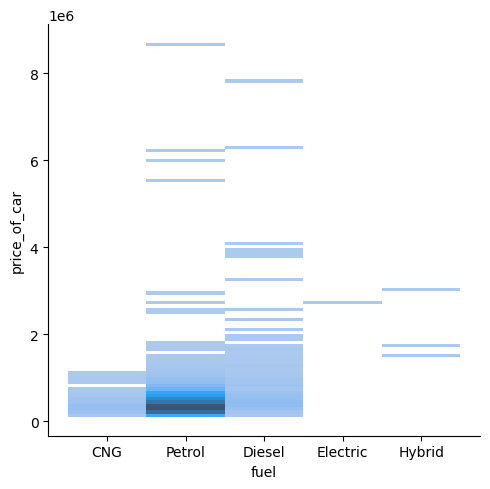

In [58]:
# 4) Displot - [price_of_car by fuel]
sns.displot(
    data=df,
    y='price_of_car',
    x='fuel')
plt.show()

#### Insights
- **Price distributions differ substantially across fuel types**, indicating fuel type as a key driver of resale price variation.
- **CNG vehicles show tightly clustered distributions at lower price ranges**, reflecting their dominance in the budget segment.
- **Diesel vehicles exhibit right-skewed distributions**, with higher price concentration in upper ranges, indicating stronger resale value retention.
- **Petrol vehicles display a wide spread across price ranges**, covering both budget and premium segments.
- **Electric and hybrid vehicles show limited distribution spread**, likely due to fewer listings and early-stage adoption in the used car market.

---
### 5.3 Categorical vs Categorical
#### A. Non-Visualization (Statistical Measures)

In [41]:
# 1) Crosstab - [state Vs  fuel]
pd.crosstab(df['state'], df['fuel'])

fuel,CNG,Diesel,Electric,Hybrid,Petrol
state,,,,,
Andhra Pradesh,0,4,0,0,20
Bihar,2,9,0,0,40
Chandigarh,1,3,0,0,17
Chhattisgarh,0,0,0,0,1
Delhi,25,4,0,0,288
Gujarat,33,41,0,0,234
Haryana,29,24,0,0,226
Himachal Pradesh,0,1,0,0,0
Karnataka,5,85,0,1,422


#### Insights
- **Petrol vehicles dominate across all states**, confirming petrol as the most widely preferred fuel type in the used car market.
- **Diesel vehicle presence varies significantly by state**, with higher counts in states like Karnataka, Maharashtra, and Telangana, reflecting long-distance and commercial usage patterns.
- **CNG vehicles are concentrated in select states** such as Maharashtra, Gujarat, Haryana, and Delhi, indicating stronger adoption in urban and cost-sensitive regions.
- **Electric and hybrid vehicles have negligible representation**, highlighting limited penetration and early-stage adoption in the used car resale market.
- Overall, the crosstab reveals **clear regional variation in fuel preferences**, emphasizing the importance of state-level market segmentation.

#### B. Visualization Techniques

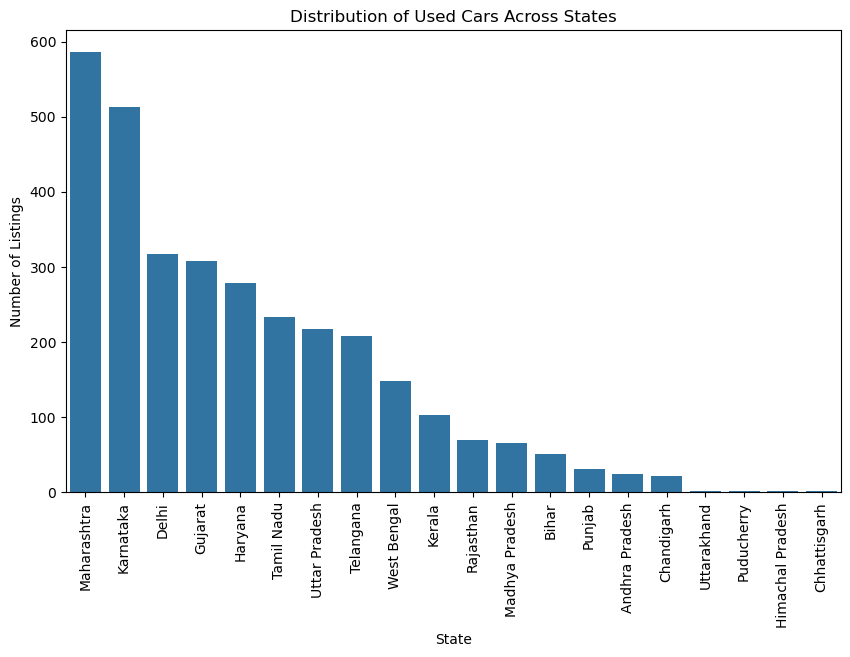

In [42]:
# 1) Count Plot - [state vs count]
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='state',
    order=df['state'].value_counts().index
)
plt.xticks(rotation=90)
plt.title('Distribution of Used Cars Across States')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.show()

#### Insights
- **Used car listings are highly concentrated in a few states**, indicating regional dominance in the resale market.
- **States with higher listing counts** likely represent larger urban populations, stronger vehicle turnover, and higher digital marketplace adoption.
- **States with fewer listings** may reflect lower market activity, limited platform penetration, or smaller population bases.
- Overall, the distribution highlights **significant regional imbalance** in used car availability across the country.

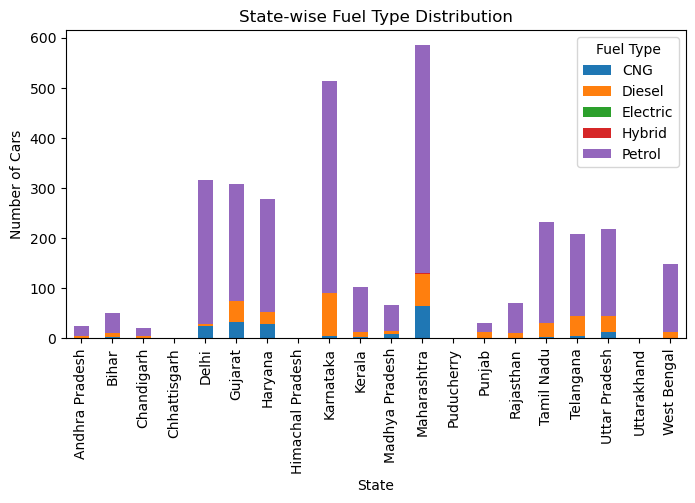

In [43]:
# 2) Stacked Bar Plot - [state vs fuel]

state_fuel_ct = pd.crosstab(df['state'], df['fuel'])
state_fuel_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(8,4)
)

plt.title('State-wise Fuel Type Distribution')
plt.xlabel('State')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)
plt.legend(title='Fuel Type')
plt.show()

#### Insights
- **Petrol vehicles form the largest share across all states**, reinforcing their dominance and high liquidity in the used car market.
- **Diesel vehicles show strong presence in certain states** such as Karnataka, Maharashtra, and Telangana, indicating higher long-distance or commercial vehicle usage.
- **CNG vehicles are concentrated in select states**, particularly urban and cost-sensitive regions, reflecting fuel affordability and infrastructure availability.
- **Electric and hybrid vehicles have minimal representation across states**, highlighting limited penetration and early-stage adoption in the resale market.
- Overall, the plot reveals **significant regional variation in fuel composition**, emphasizing the importance of state-specific inventory and pricing strategies.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

6.MULTIVARIATE ANALYSIS
--------------------

Multivariate analysis involves analyzing more than two variables
simultaneously to identify patterns, relationships, and interactions.

Visualization Techniques
------------------------
- Pair Plot
- Correlation Heatmap

Purpose
-------
- Understand relationships among multiple variables
- Detect multicollinearity
- Identify patterns and clusters
- Support feature selection

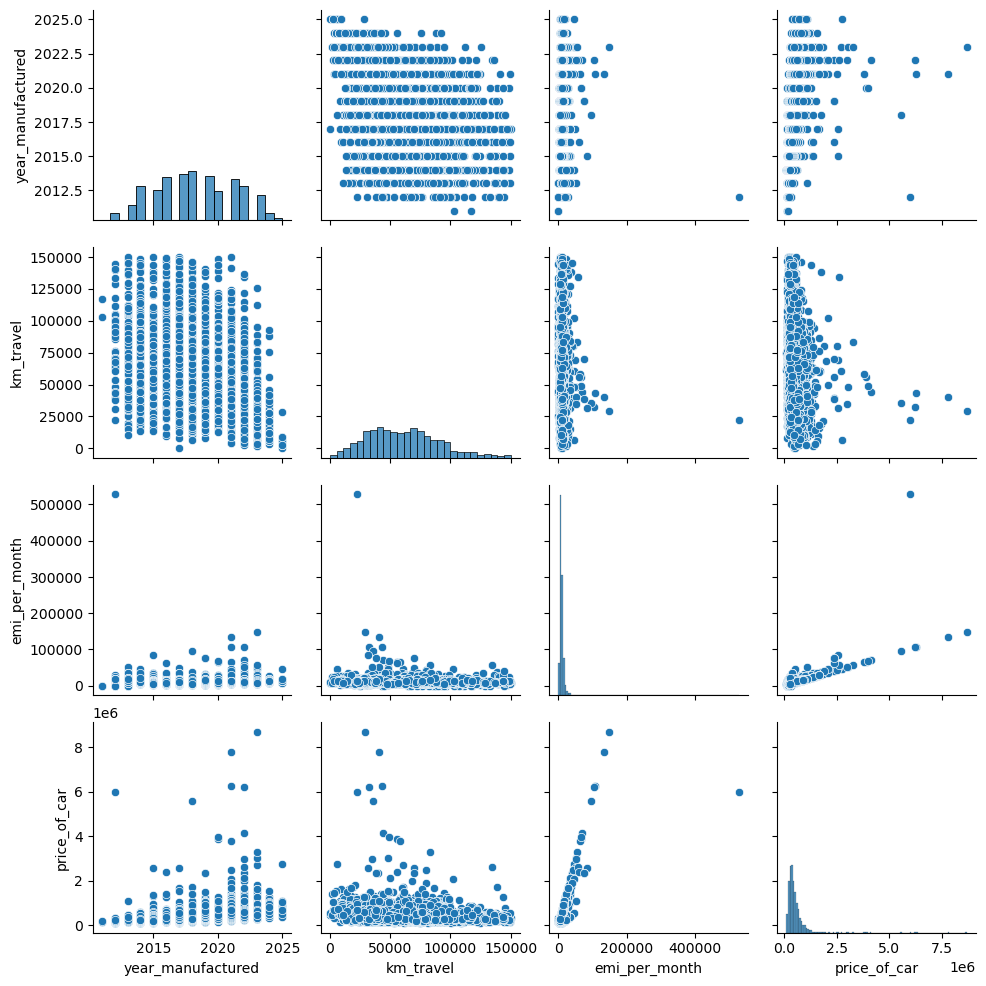

In [44]:
# Select only numerical columns
num_df = df[['year_manufactured', 'km_travel', 'emi_per_month', 'price_of_car']]

# Pair plot
sns.pairplot(num_df)
plt.show()

## Unique Insights from Pair Plot Analysis

- **Price vs EMI per Month**: Car price increases sharply with EMI per month, showing a strong positive relationship.

- **Price vs Kilometers Travelled**: Car price generally decreases as kilometers travelled increase, though the relationship is weak.

- **Price vs Year Manufactured**: Newer manufactured cars tend to have higher prices, indicating a positive trend.

- **EMI vs Kilometers Travelled**: EMI values are scattered across all kilometer ranges, showing no clear relationship.

- **EMI vs Year Manufactured**: EMI shows a very weak upward trend with newer manufacturing years.

- **Kilometers Travelled vs Year Manufactured**: Older manufactured cars tend to have higher kilometers travelled, showing a clear negative relationship.

- **Kilometers Travelled Distribution**: Most cars fall within a mid-range of usage, with fewer extreme values.

- **Year Manufactured Distribution**: The dataset is dominated by newer cars, indicating more recent manufacturing years.


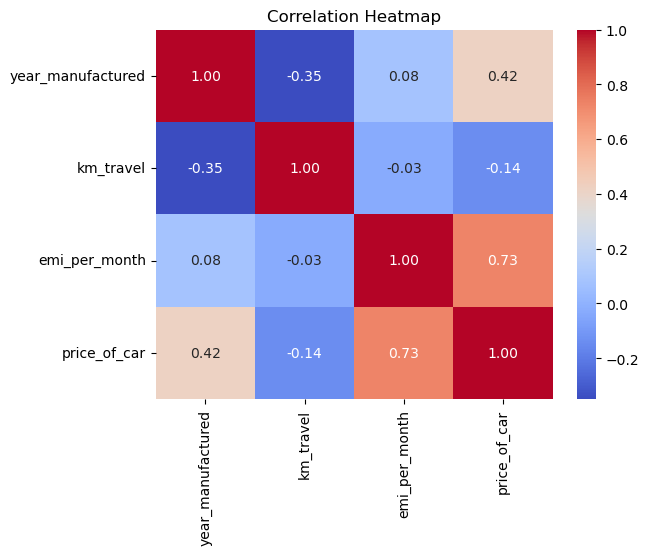

In [45]:
sns.heatmap(
    num_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()

## Unique Insights from Correlation Analysis

- **Price vs EMI per Month**: As car price increases, EMI per month also increases strongly, indicating a high positive relationship.

- **Price vs Kilometers Travelled**: As kilometers travelled increase, car price slightly decreases, showing a weak negative relationship.

- **Price vs Year Manufactured**: Newer manufacturing years are associated with higher car prices, indicating a moderate positive relationship.

- **EMI vs Kilometers Travelled**: EMI has almost no relationship with kilometers travelled, meaning usage does not influence EMI values.

- **EMI vs Year Manufactured**: Manufacturing year has a very weak influence on EMI, showing minimal impact.

- **Kilometers Travelled vs Year Manufactured**: Older cars generally have higher kilometers travelled, indicating a moderate negative relationship.


## 7. Business Insights
- Market trends
- Pricing behavior
- Regional patterns

(Need to improve ) ## 7. Business Insights

- **Petrol vehicles dominate the used car market**, making them the most liquid segment with faster resale cycles and consistent demand across all states.

- **Diesel cars retain higher resale value**, especially in states with higher long-distance or commercial usage, indicating better value retention over time.

- **Used car prices increase strongly with newer manufacturing years**, highlighting vehicle age as one of the most critical factors influencing resale value.

- **Mileage has a negative but weak impact on resale price**, suggesting that buyers consider multiple factors such as fuel type, year, and vehicle segment beyond just kilometers travelled.

- **Used car listings are heavily concentrated in a few states**, reflecting regional dominance driven by urbanization, income levels, and digital platform adoption.

- **Fuel preferences vary significantly across states**, emphasizing the need for state-specific inventory planning and pricing strategies.

- **CNG vehicles are positioned in the budget segment**, while electric and hybrid vehicles show limited resale presence, indicating early-stage adoption in the used car market.

- **Outliers and premium vehicles significantly affect average prices**, suggesting that median-based metrics provide more robust insights for pricing analysis.


## 8. Limitations & Assumptions

(need to improve)## 8. Limitations & Assumptions

- The analysis is based on the available dataset and may not represent the entire used car market across all regions.
- Electric and hybrid vehicles have very limited observations, which restricts reliable distribution and comparative analysis.
- Average price-based metrics are sensitive to outliers; although median values were used in some cases, extreme prices may still influence results.
- City-level variations were not deeply analyzed, which may affect pricing differences within the same state.
- Vehicle brand, model, and condition were not fully incorporated, even though they significantly influence resale value.
- The analysis assumes that the listed price accurately reflects market value, ignoring potential negotiation or discounts.


## 9. Conclusion
- Final summary
- Practical implications